<a href="https://colab.research.google.com/github/ssjsmith750/Customer_conversion_prediction_project/blob/main/customer_conversion_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.5 MB/s eta 0:00:00


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 23.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataprep
from dataprep.eda import create_report
import plotly.express as px
import dash
from dataprep.datasets import load_dataset

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df

age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
0              1      unknown   no  
1              1      unknown   no  
2              1      unknown   no  
3              1      unknown   no  
4              1      unknown   no  
...          ...          ...  ...  
45206          3      unknown  yes  
45207          2      unknown  yes  
45208          5      success  yes  
45209          4      unknown   no  
45210          2        other   no  

[45211 rows x 11 columns]

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

# **Checking for Balanced or Imbalanced**

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

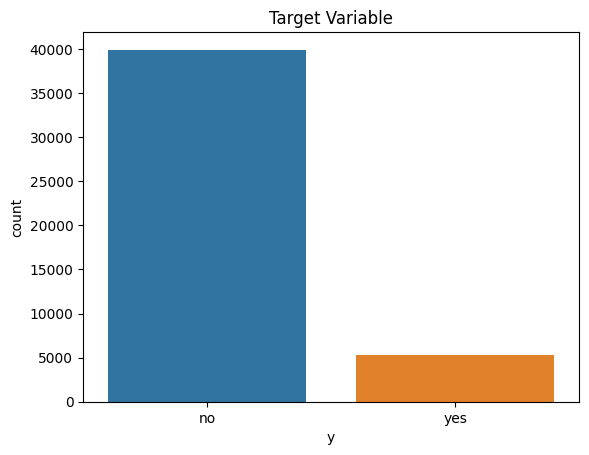

In [ ]:
sns.countplot(x="y", data=df)
plt.title("Target Variable")
plt.show()

# **1.DATA CLEANING**

Important 5 Things in Data Cleaning
# 1.Null Values
# 2.Duplicates
# 3.structure
# 4.Format
# 5.outliers

In [ ]:
#Checking all the columns are in right Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
# checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
# checking for the duplicate values
df.duplicated().sum()

6

In [ ]:
df = df.drop_duplicates()        #duplicated values dropped
df.shape  

(45205, 11)

**Keeping the original dataset and creating a copy of dataset**

In [ ]:
df1 = df

In [ ]:
df1.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no

# **Replacing the Unknown values**

In [ ]:
df1['Target'] = df1['y'].map({"yes":1,"no":0})
df1

age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  Target  
0              1      unknown   no       0  
1              1      unknown   no       0  
2              1      unknown   no       0  
3              1      unknown   no       0  
4              1      unknown   no       0  
...          ...          ...  ...     ...  
45206          3      unknown  yes       1  
45207          2      unknown  yes       1  
45208          5      success  yes       1  
45209          4      unknown   no       0  
45210          2        other   no       0  

[45205 rows x 12 columns]

In [ ]:
df1 = df.drop('y', axis=1)

In [ ]:
df1.head()

age           job  marital education_qual call_type  day  mon  dur  \
0   58    management  married       tertiary   unknown    5  may  261   
1   44    technician   single      secondary   unknown    5  may  151   
2   33  entrepreneur  married      secondary   unknown    5  may   76   
3   47   blue-collar  married        unknown   unknown    5  may   92   
4   33       unknown   single        unknown   unknown    5  may  198   

   num_calls prev_outcome  Target  
0          1      unknown       0  
1          1      unknown       0  
2          1      unknown       0  
3          1      unknown       0  
4          1      unknown       0

# **Outlier Deduction and Correction**
While Checking for the outliers, It can be clearly seen that there are some outliers.

Best Appraoch for Outliers is : **IQR** (Inter Quantile Range)

IQR = Q3-Q1

Any value > Q3 + (1.5*IQR) ------ = Outlier

Any value < Q1 - (1.5*IQR) ------ = Outlier

**Outlier Detection**

In [ ]:
#Checking for outliers
df1.describe()  

age          day           dur     num_calls        Target
count  45205.000000  45205.00000  45205.000000  45205.000000  45205.000000
mean      40.937087     15.80688    258.183055      2.763898      0.117000
std       10.619130      8.32234    257.538504      3.098189      0.321424
min       18.000000      1.00000      0.000000      1.000000      0.000000
25%       33.000000      8.00000    103.000000      1.000000      0.000000
50%       39.000000     16.00000    180.000000      2.000000      0.000000
75%       48.000000     21.00000    319.000000      3.000000      0.000000
max       95.000000     31.00000   4918.000000     63.000000      1.000000

In [ ]:
lower_thershold= []
upper_thershold= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df1[i].quantile(0.75) - df1[i].quantile(0.25)
    lower_bound= df1[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df1[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_thershold.append(lower_bound)
    upper_thershold.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


**outlier Correction**

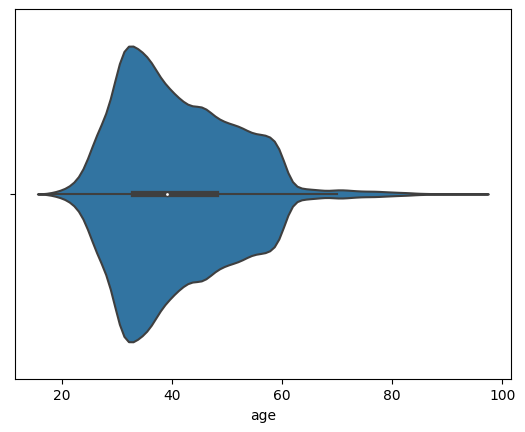

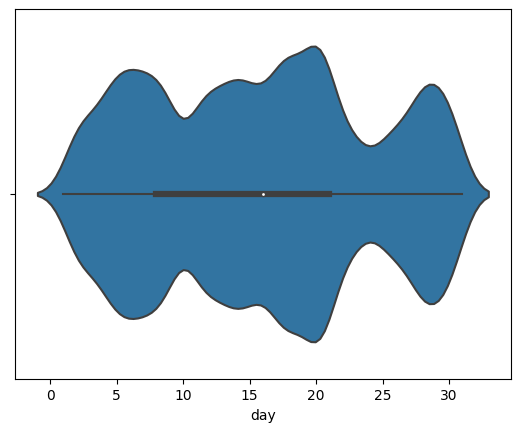

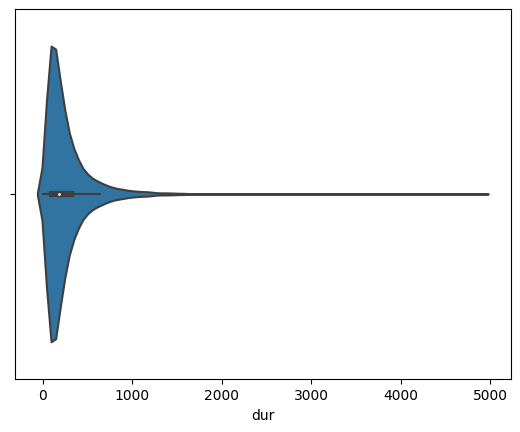

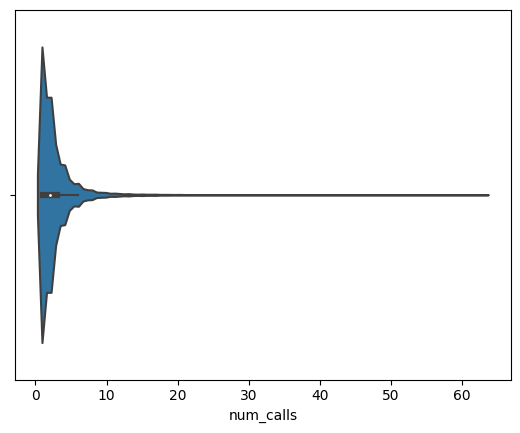

In [ ]:
# violin plot for age
sns.violinplot(x=df1['age'])
plt.show()

#violin plot for day
sns.violinplot(x=df1['day'])
plt.show()

#violin plot for dur
sns.violinplot(x=df1['dur'])
plt.show()

# violin plot for num_calls
sns.violinplot(x=df1['num_calls'])
plt.show()




From the plots it can be clearly seen that there are outliers in **(Age,dur,num_calls)** and no outliers in the day column

**Outlier Correction**

**Removing outlier for Age**

In [ ]:
df1.age = df1.age.clip(10.5,70.5)

In [ ]:
df1.age.describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

**Removing outlier for dur**

In [ ]:
df1.dur = df1.dur.clip(-221.0 , 643.0)
df1.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

**Removing outlier for num_calls**

In [ ]:
df1.num_calls = df1.num_calls.clip(-2.0 , 6.0)
df1.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

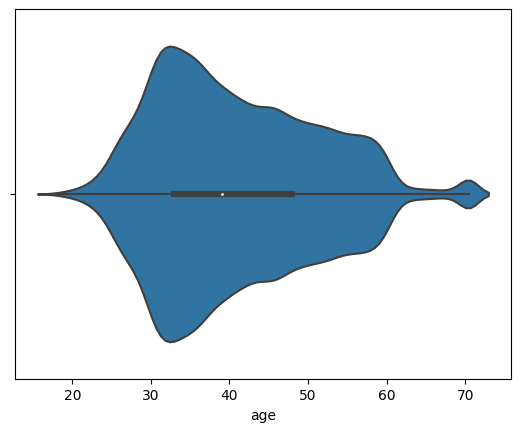

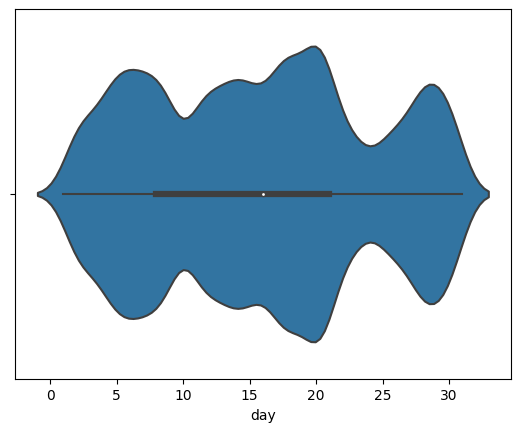

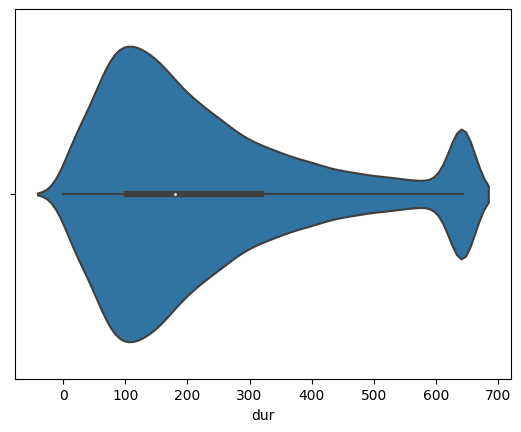

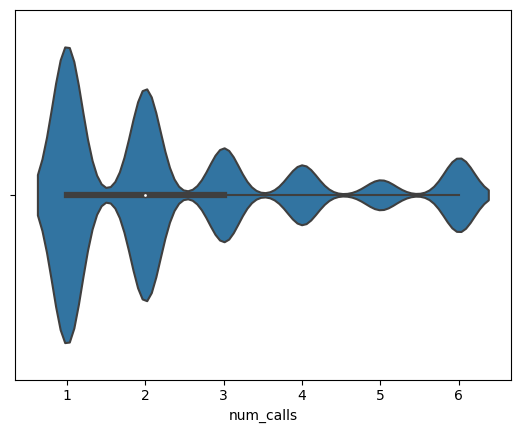

In [ ]:
#violin plot for age
sns.violinplot(x=df1['age'])
plt.show()

#violin plot for day
sns.violinplot(x=df1['day'])
plt.show()

#violin plot for dur

sns.violinplot(x=df1['dur'])
plt.show()
#violin plot for num_calls

sns.violinplot(x=df1['num_calls'])
plt.show()

# **EDA - Exploratory Data Analysis**

EDA is an important step in the data analysis process, as it helps for a better understanding to identify the Date and relationships between variables and also the missing values and errors before further analysis.

# **Distribution of Feature and Target variable**

DataPrep Report
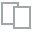
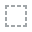
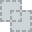
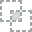
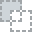
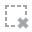
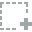
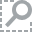
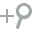
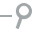
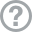
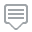
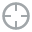
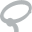
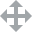
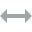
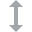
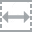
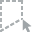
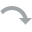
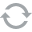
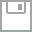
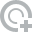
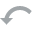
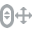
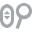
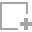
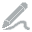
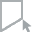
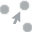
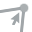
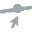

In [ ]:
create_report(df1)

In [ ]:
fig=px.bar(df1,x="education_qual",y="Target",hover_name="job",color="marital",animation_frame="age")
fig.show()

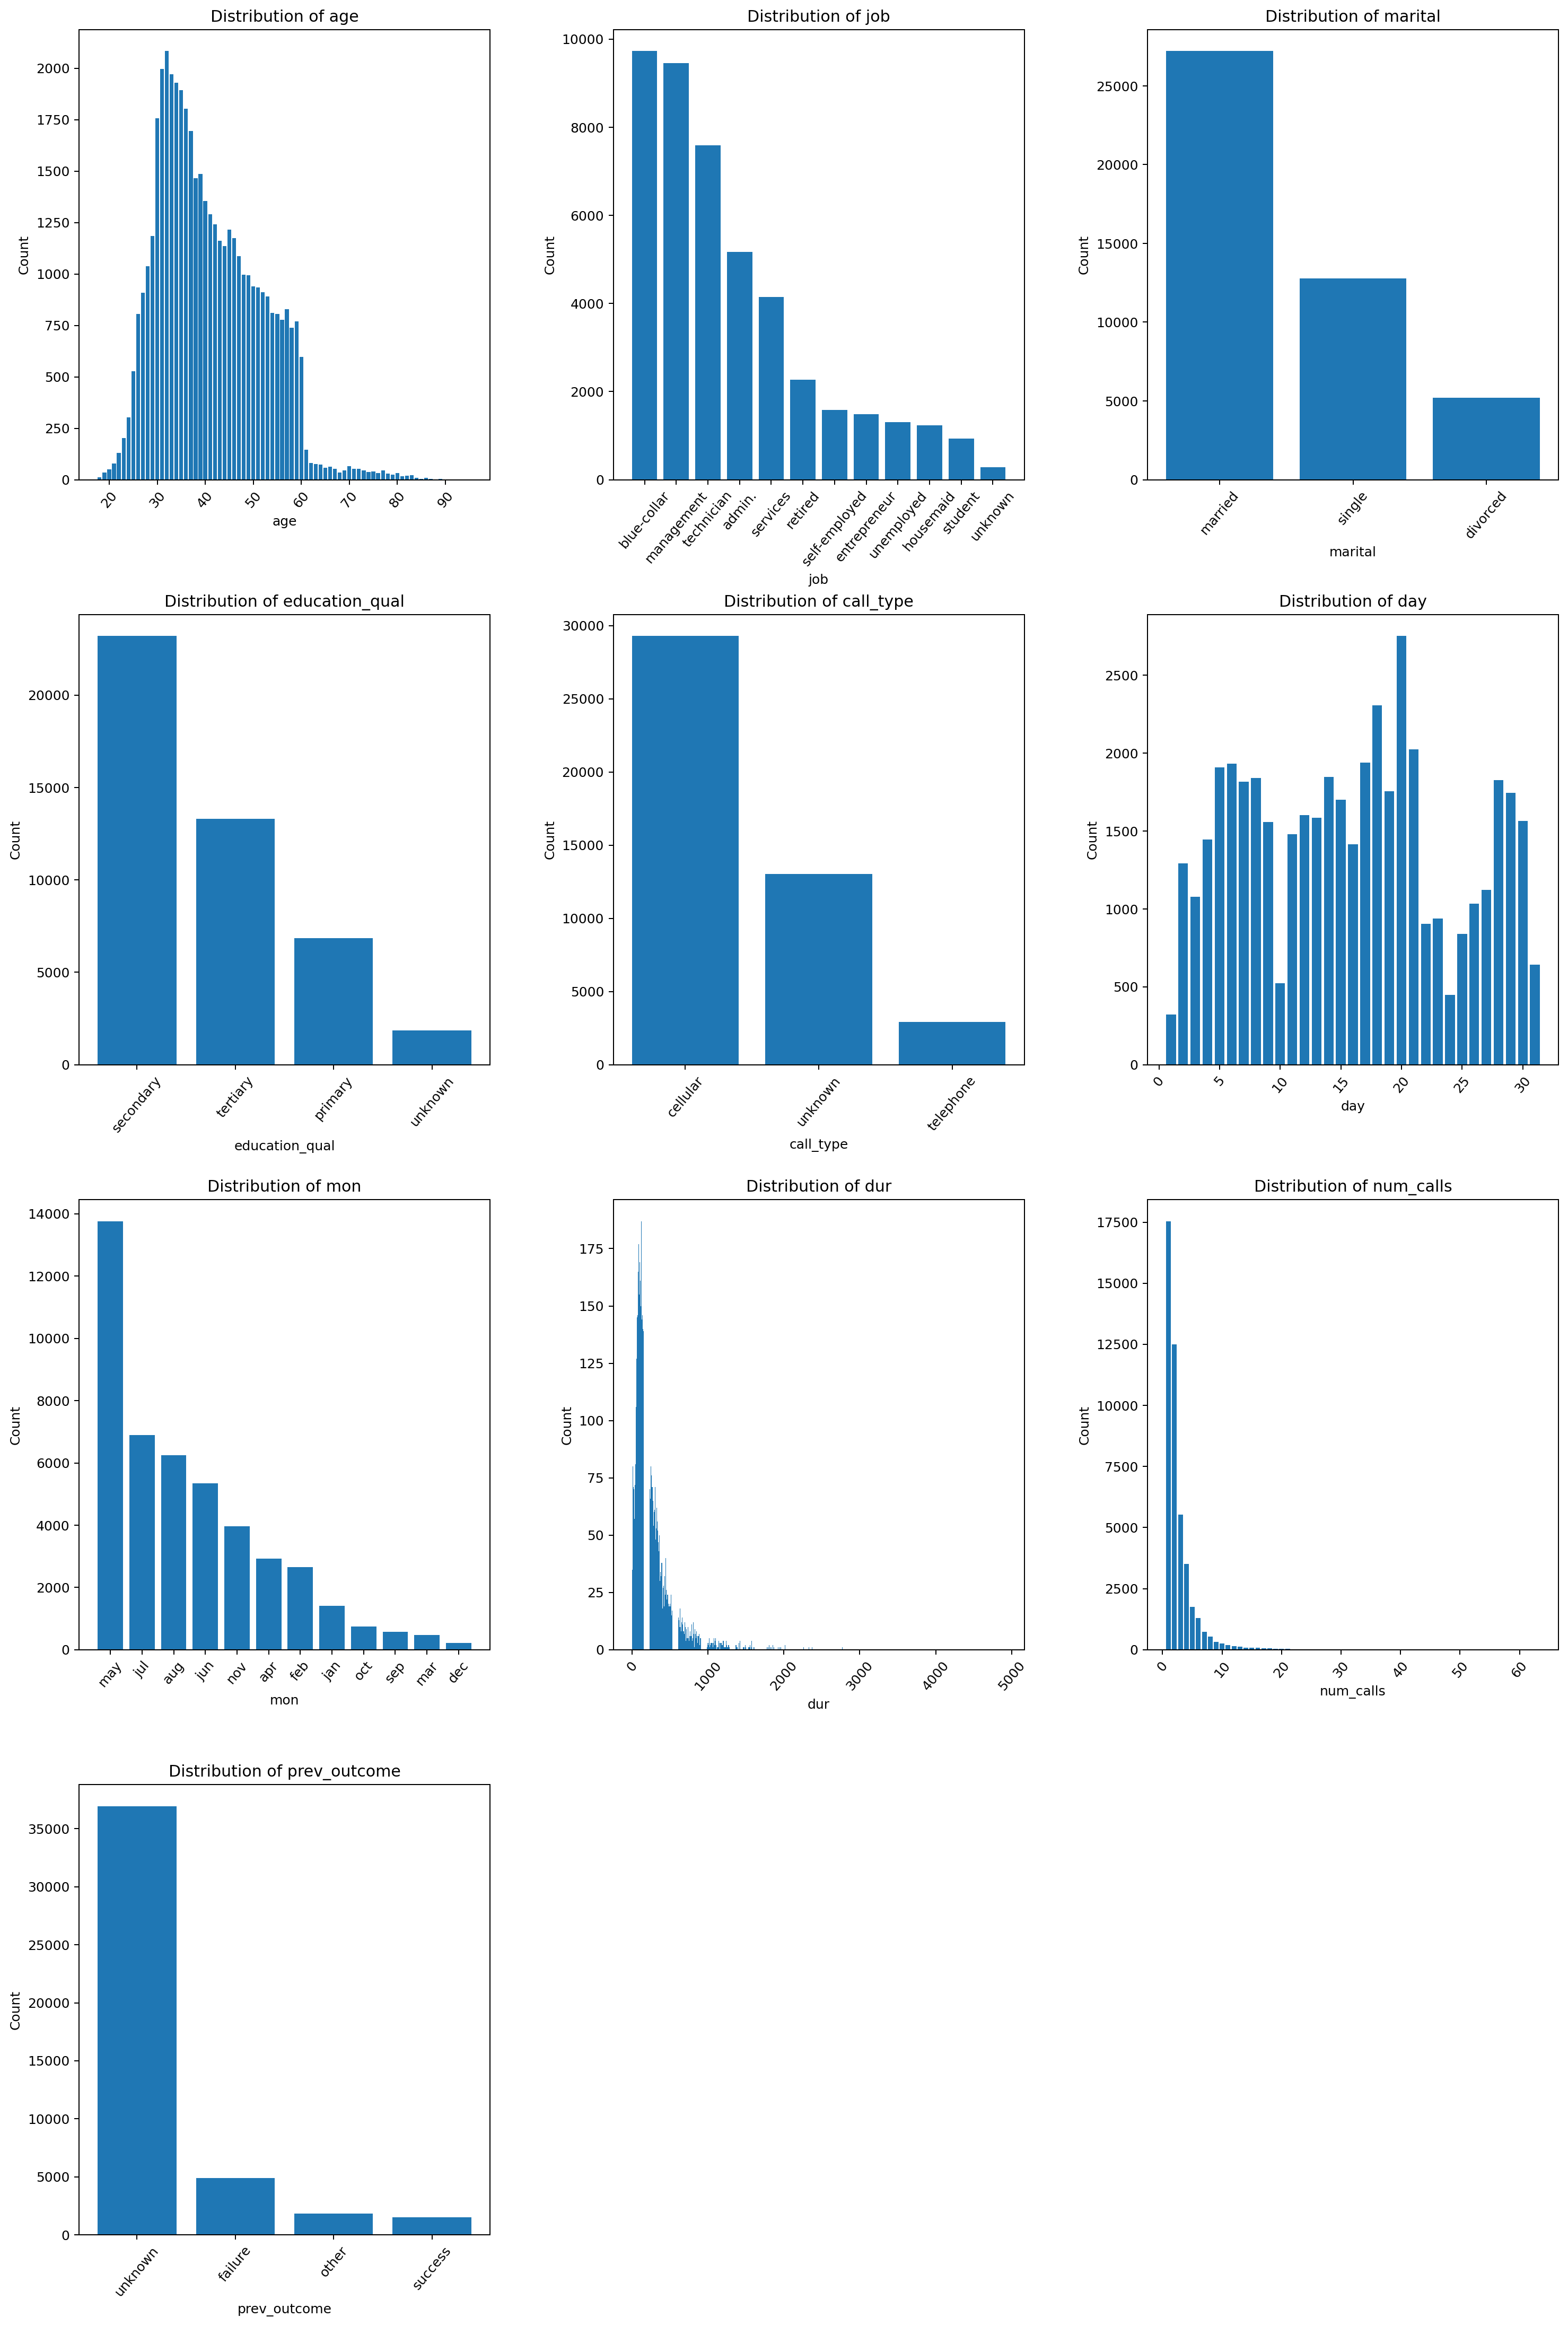

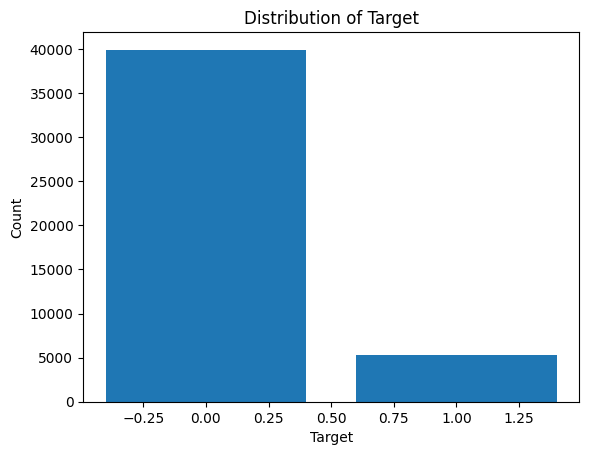

In [ ]:
plt.figure(figsize=(20,30),dpi=180)

# Loop through each feature and plot its distribution
for i, cat_feature in enumerate(df1.columns[:10]):
    plt.subplot(4, 3, i+1)
    cat_counts = df[cat_feature].value_counts()
    plt.bar(cat_counts.index, cat_counts.values)
    plt.title(f"Distribution of {cat_feature}")
    plt.xticks(rotation=50)
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    
plt.show()

# Visualize the distribution of the target variable
target = "Target"
target_counts = df[target].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.title(f"Distribution of {target}")
plt.xlabel(target)
plt.ylabel("Count")
plt.show()

# **From the Above Plots we can cleary see that:**



* The most targetted Age Catogory is between **20-60** years.

* **Blue-collar, Management, Technician** are highly targetted.

* **Married** people are highly targetted.

* In Education Catagory **Secondary Education** people are highly targetted.

* **Cellular calls** are high while comparing unknown & telephone.

* From **15th - 22nd** of a month is highly targetted.

* Targetted huge number of customers in the month of **May**.

* Customers who have converted have been called only **once in a Time**.

* In previous outcome Most rates are **unknown**.

* While comparing - **NO** (88.30%) plays a major role in target.


# **FEATURE VS TARGET**

**Catagorical Feature vs Target**

Text(0, 0.5, 'count')

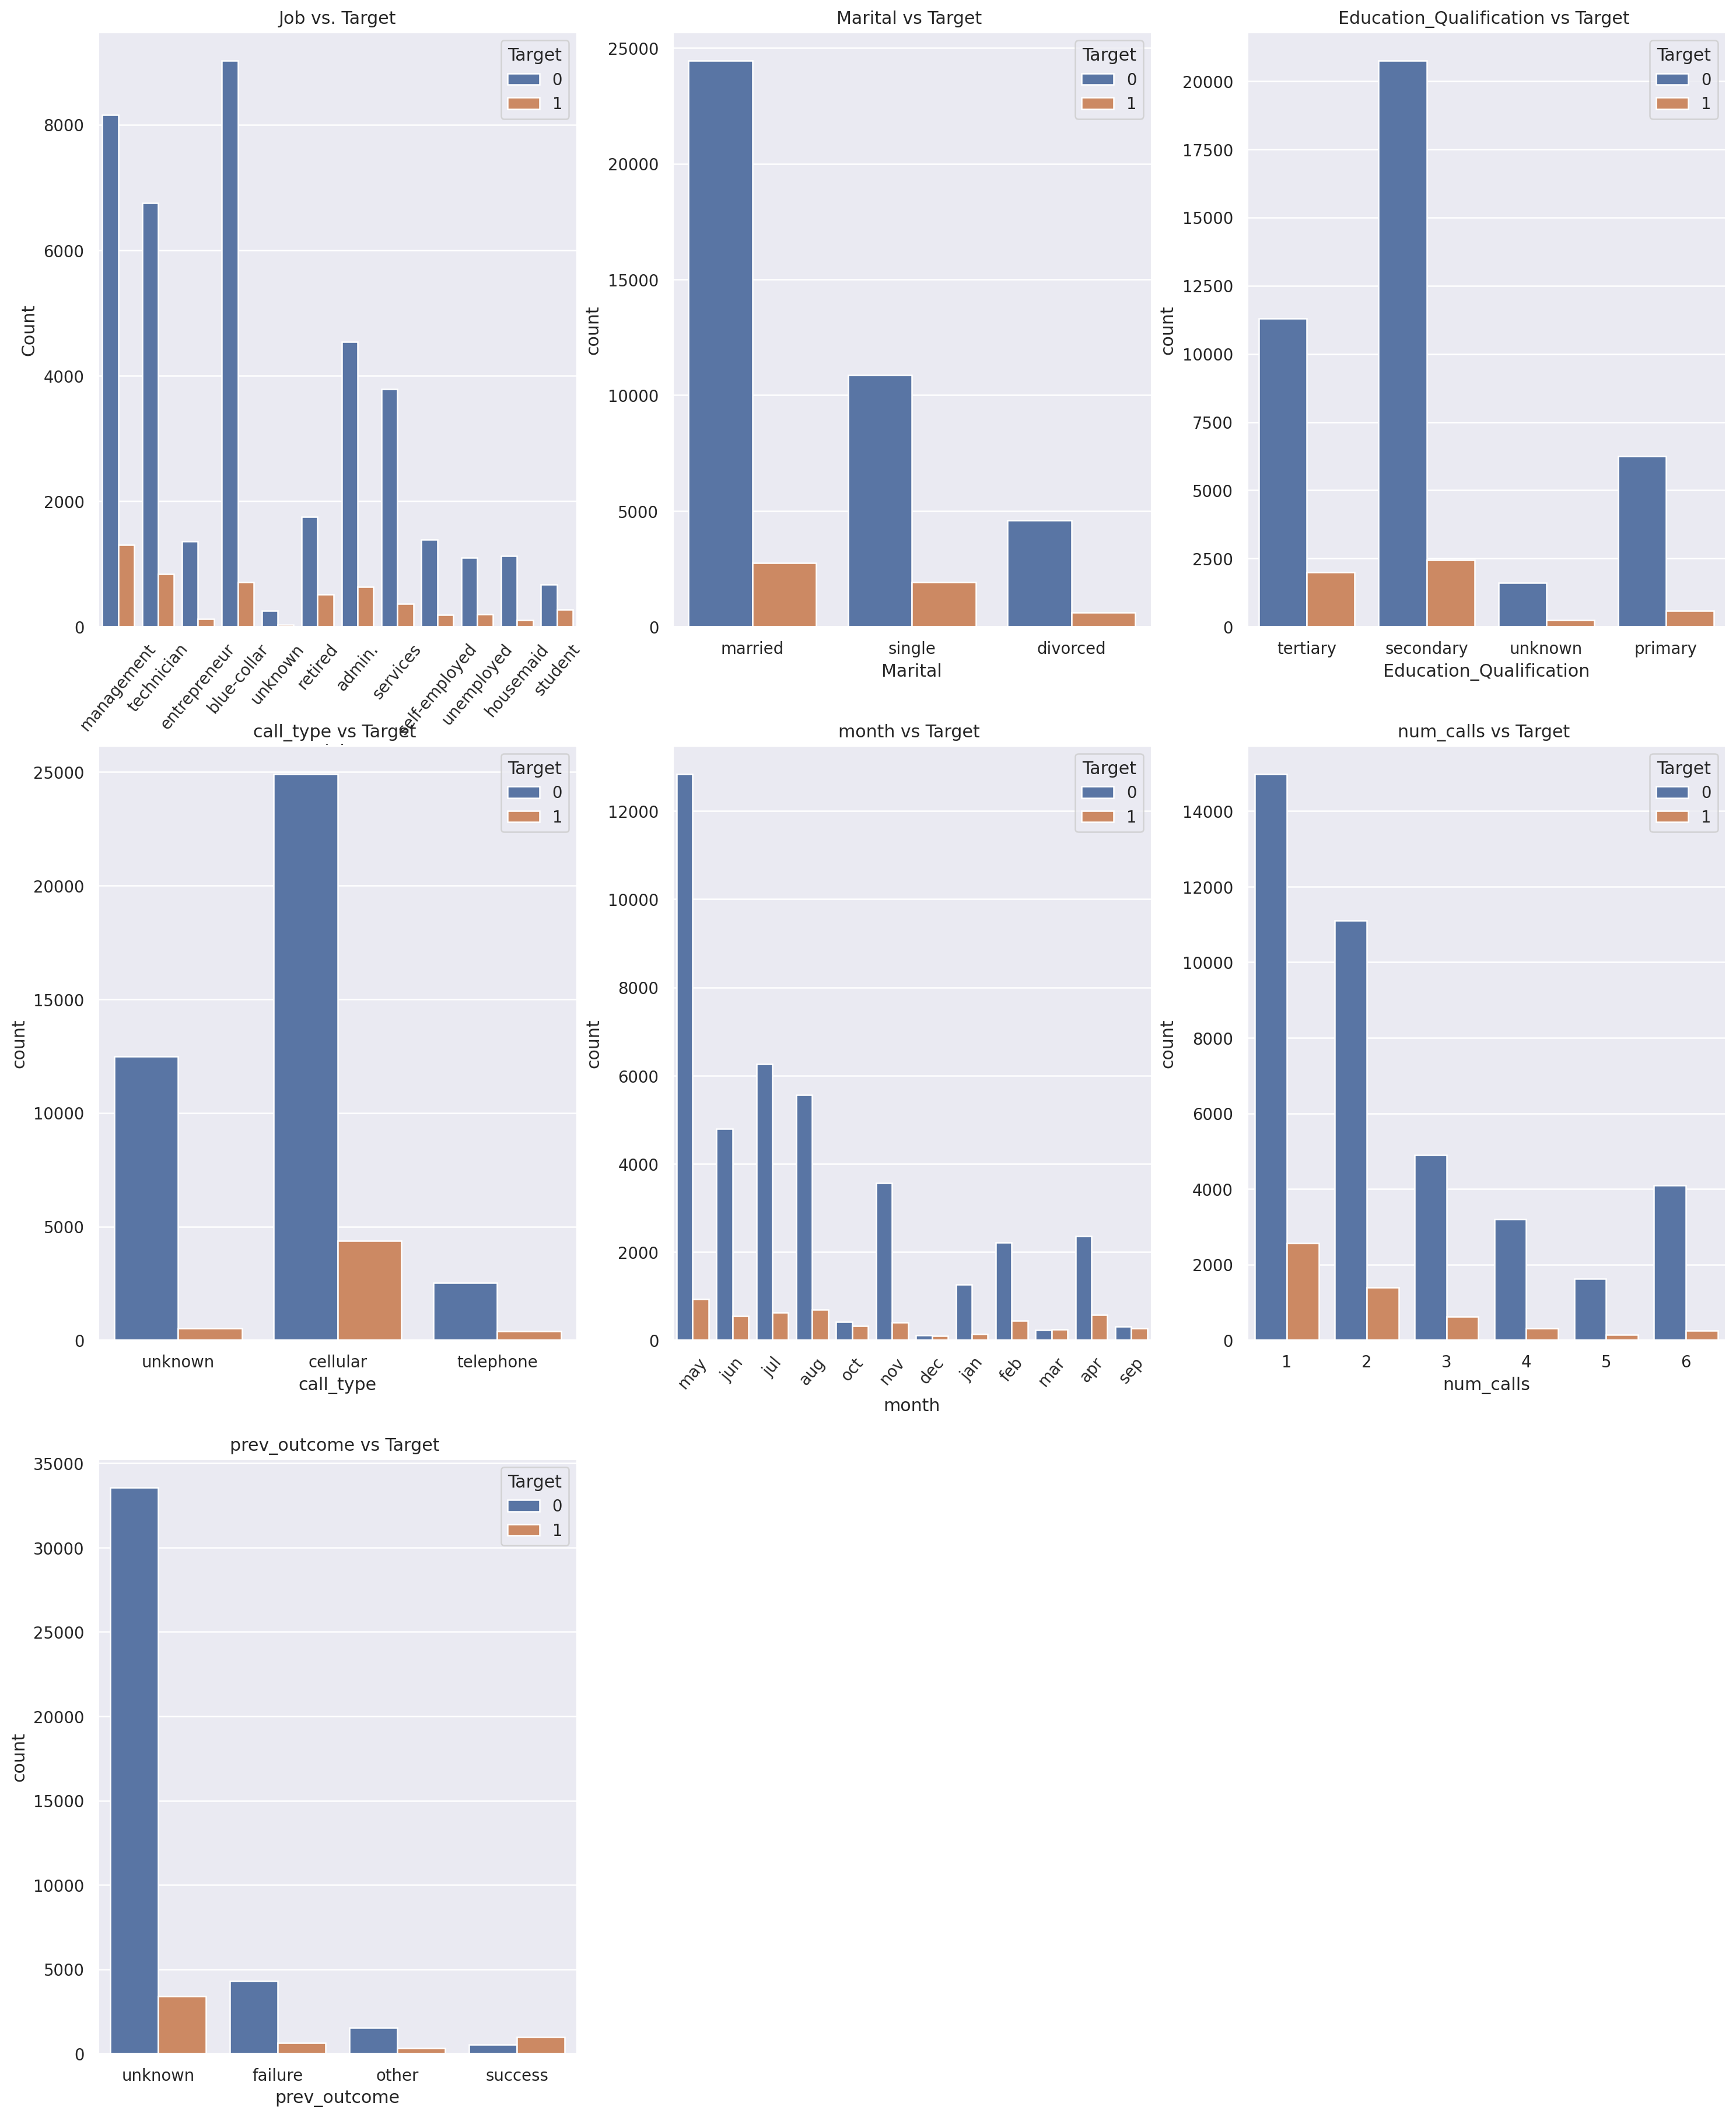

In [ ]:

plt.figure(figsize=(20,25),dpi=180)

#Job vs Target
sns.set(style="darkgrid")

plt.subplot(3,3,1)
sns.countplot(x="job", hue="Target", data=df1)
plt.xticks(rotation=50)

plt.title("Job vs. Target")
plt.xlabel("Job")
plt.ylabel("Count")

#plt.show()

# Marital vs Target

sns.set(style="darkgrid")

plt.subplot(3,3,2)
sns.countplot(x="marital", hue="Target",data=df1)
plt.title("Marital vs Target ")
plt.xlabel("Marital")
plt.ylabel("count")

#plt.show()


############ Education_Qualification vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,3)
sns.countplot(x="education_qual", hue="Target",data=df1)
plt.title("Education_Qualification vs Target ")
plt.xlabel("Education_Qualification")
plt.ylabel("count")

#plt.show()


############ call_type vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,4)
sns.countplot(x="call_type", hue="Target",data=df1)
plt.title("call_type vs Target ")
plt.xlabel("call_type")
plt.ylabel("count")

#plt.show()


############ Month vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,5)
sns.countplot(x="mon", hue="Target",data=df1)
plt.xticks(rotation=50)
plt.title("month vs Target ")
plt.xlabel("month")
plt.ylabel("count")

#plt.show()


############# num_calls vs Target ############

sns.set(style="darkgrid")


plt.subplot(3,3,6)
sns.countplot(x="num_calls", hue="Target",data=df1)
plt.title("num_calls vs Target ")
plt.xlabel("num_calls")
plt.ylabel("count")

#plt.show()


############# prev_outcome vs Target ############

sns.set(style="darkgrid")

plt.subplot(3,3,7)
sns.countplot(x="prev_outcome", hue="Target",data=df1)
plt.title("prev_outcome vs Target ")
plt.xlabel("prev_outcome")
plt.ylabel("count")

#plt.show()


# **Categorical Data Vs Target**

**Job**

Management customers are said Yes
Blue collar customers said No

**Marital**

Married people said yes
married people said No

**Qualification**

Secondary Education people says Yes
Secondary Education people says No

**call Type**

Calls Made through cellullar  says Yes
calls Made through cellullar  says No

**Month**

May month has the Heighst Yes
May month has the Heighst No

**Previous_outcome**

Unknown Calls have Heighst Yes
Unknown Calls have Heighst No



# **Numerical Feature vs Target -- Age, Day, Duration, No of Calls**

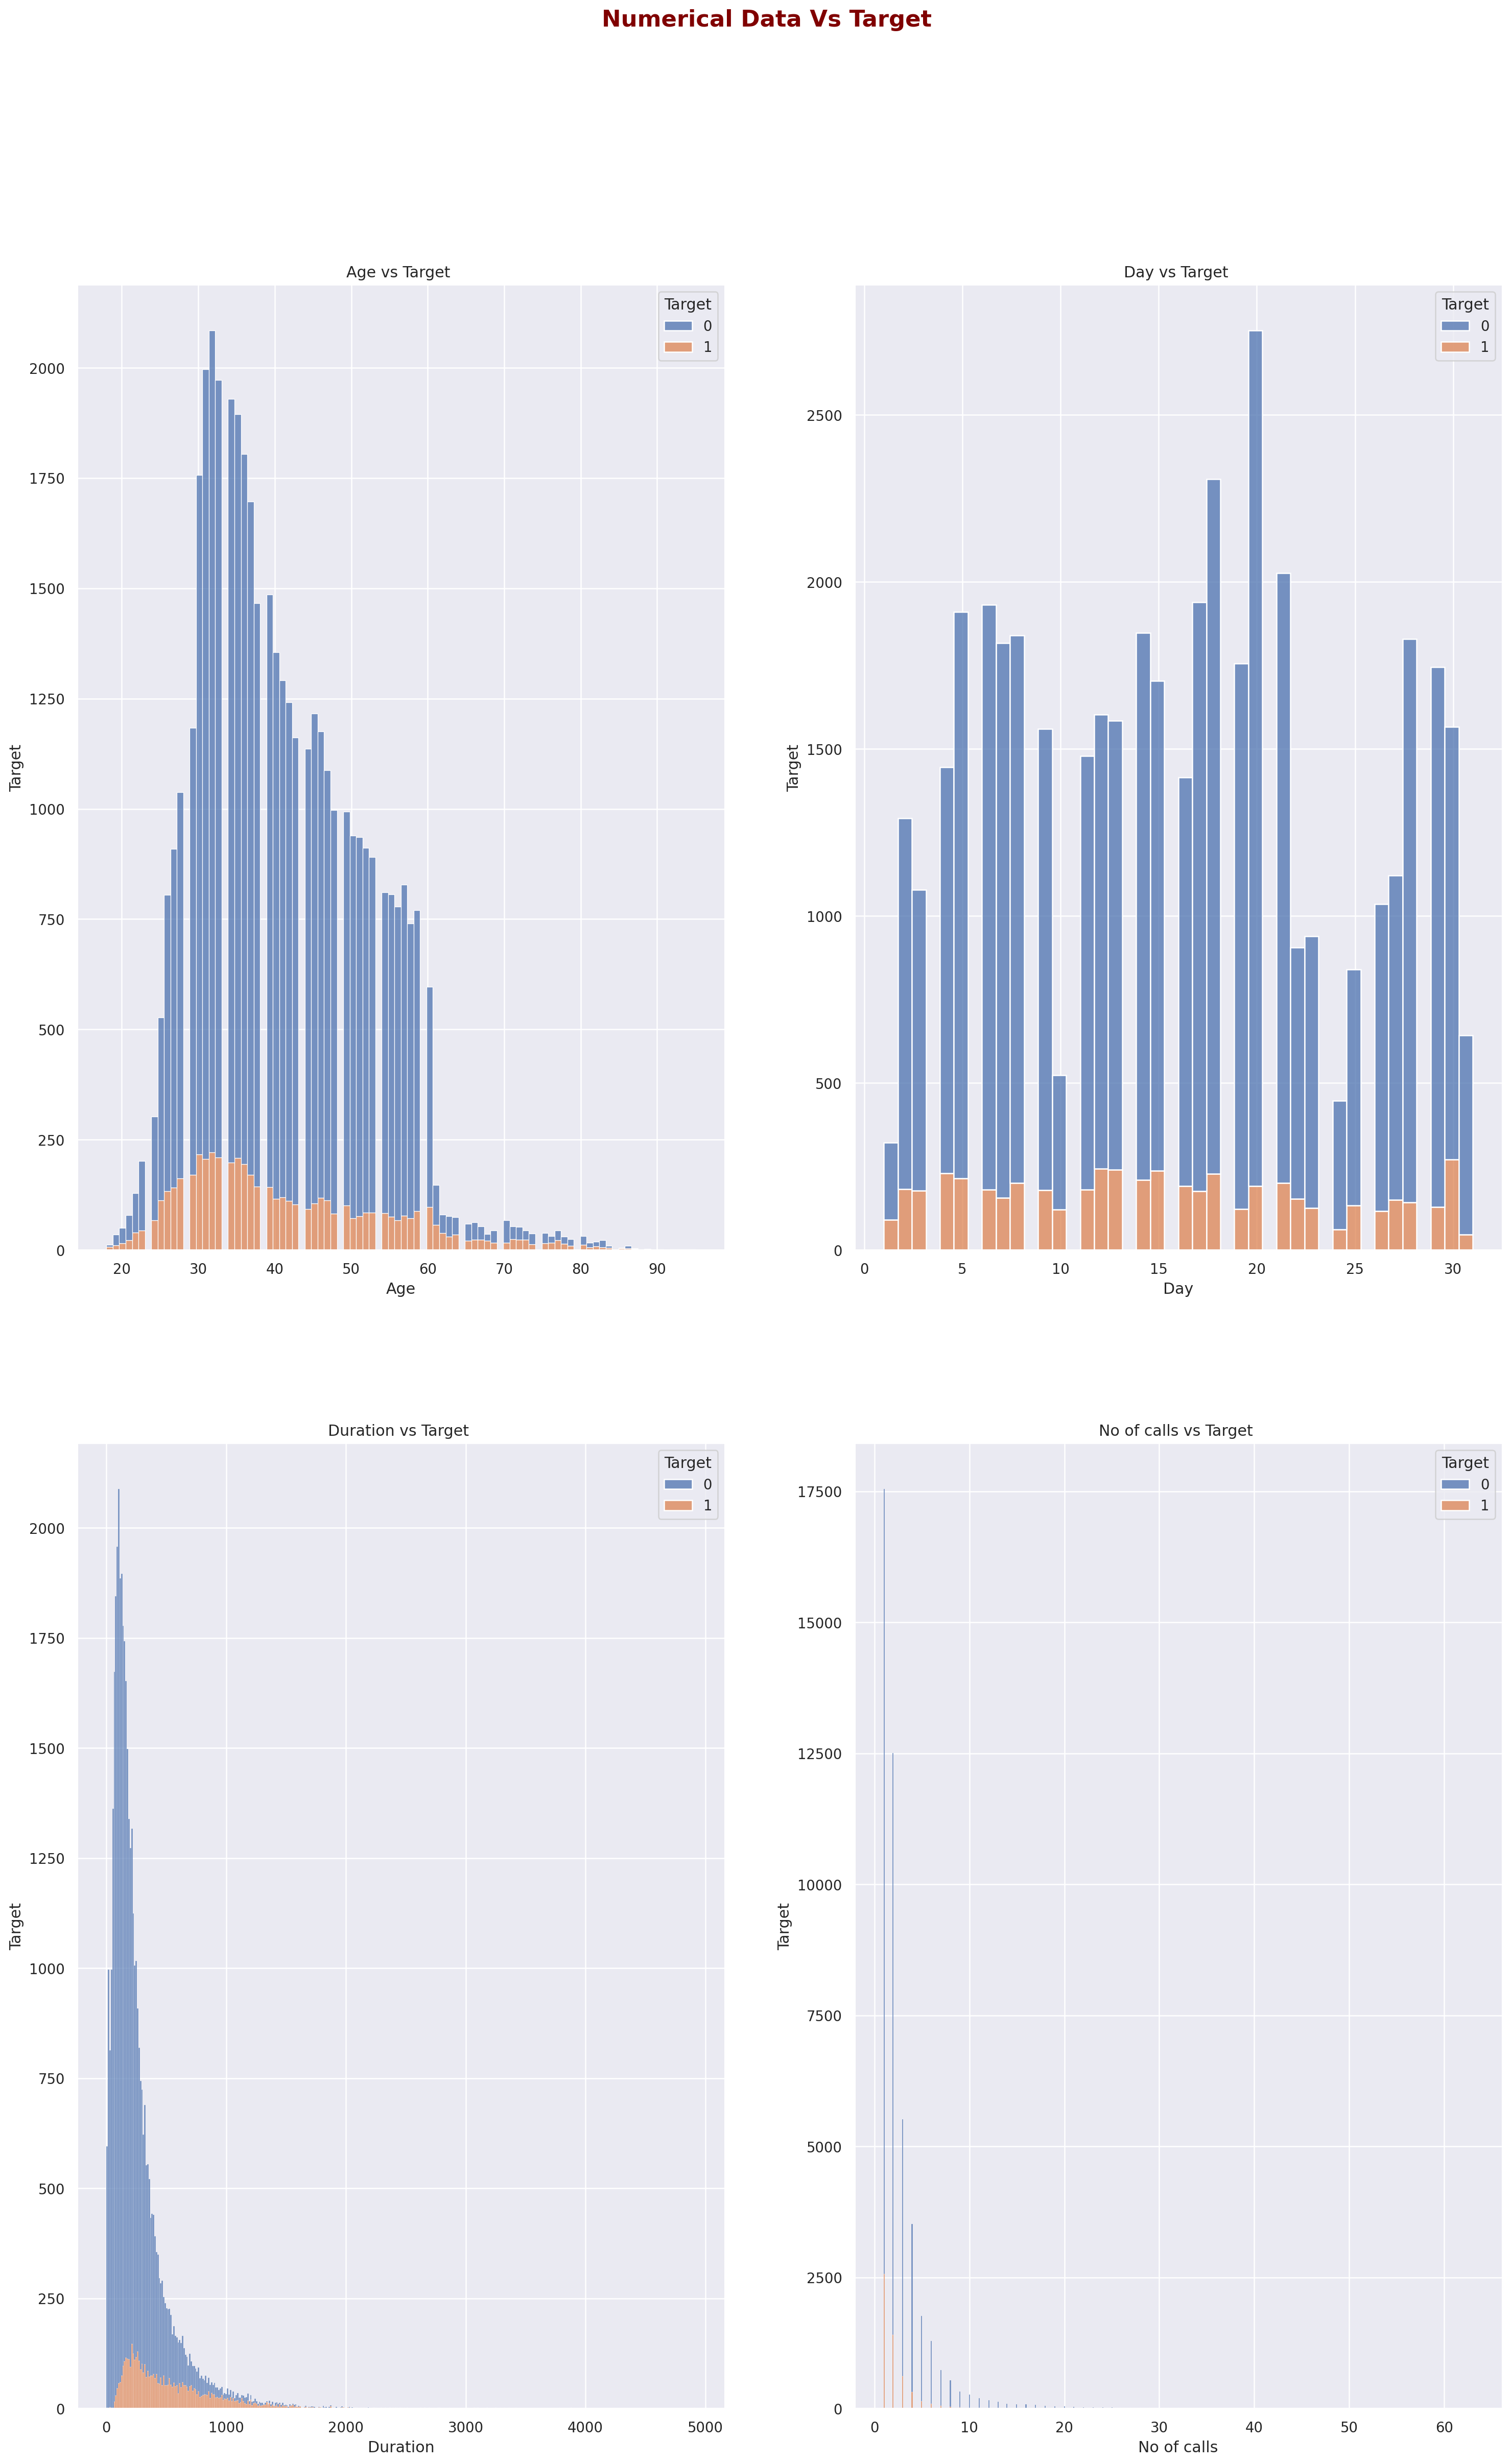

In [ ]:
plt.figure(figsize=(20,30),dpi=180)
#sub title to show title for overall plot 
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon') 

#Age vs Target
plt.subplot(2,2,1)
sns.histplot(data=df, x="age", hue="Target", multiple="stack")
plt.title("Age vs Target ")
plt.xlabel("Age")
plt.ylabel("Target")

#Day vs Target
plt.subplot(2,2,2)
sns.histplot(data=df, x="day", hue="Target", multiple="stack")
plt.title("Day vs Target ")
plt.xlabel("Day")
plt.ylabel("Target")

#Duration vs Target
plt.subplot(2,2,3)
sns.histplot(data=df, x="dur", hue="Target", multiple="stack")
plt.title("Duration vs Target ")
plt.xlabel("Duration")
plt.ylabel("Target")

#No of calls vs Target
plt.subplot(2,2,4)
sns.histplot(data=df, x="num_calls", hue="Target", multiple="stack")
plt.title("No of calls vs Target ")
plt.xlabel("No of calls")
plt.ylabel("Target")

plt.show()


# **Numerical Feature vs Target**

**Age**

Middle age people are Highly Targetted
Middle age people are Highly Subscribed

**Days**

15 - 24 of a month is highly targetted

15 - 24 of a month has higher subscribtion

**Duration**

Higher the call duration higher the subscription

**No of Calls **

No of calls increases subscription also increased

**Feature vs Target Distribution --- No fo people Subscribed**

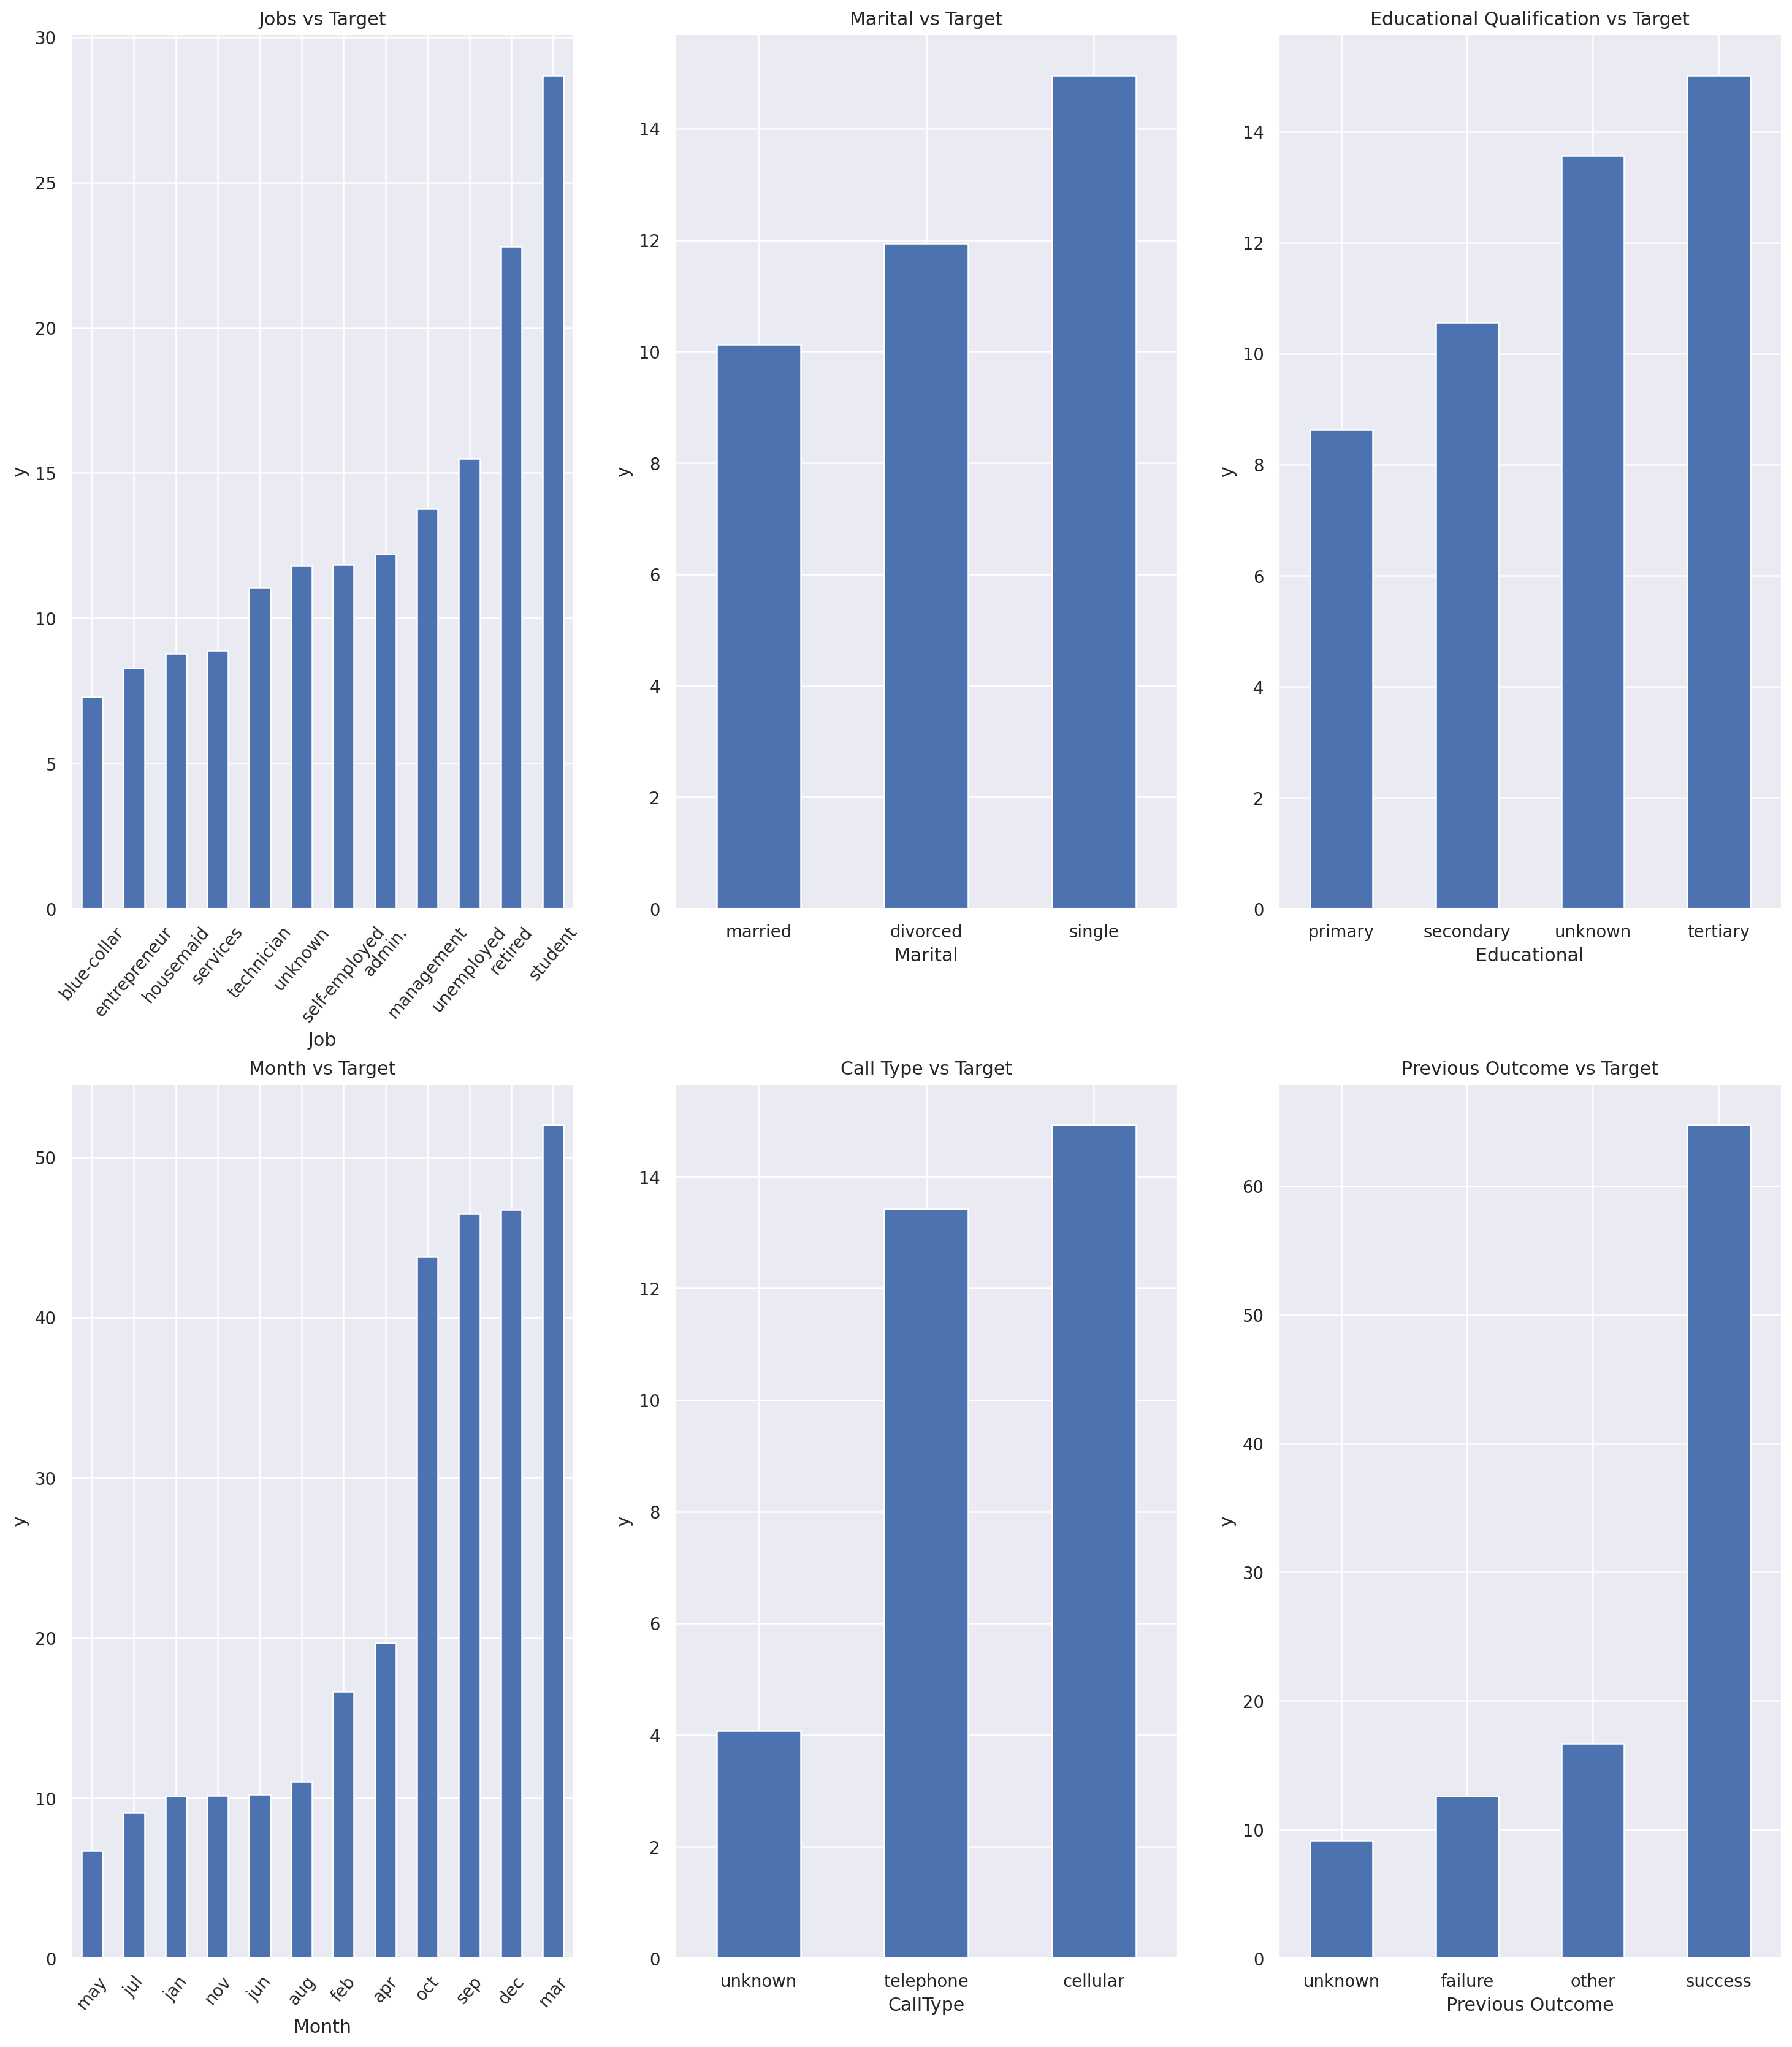

In [ ]:
plt.figure(figsize=(20,35), dpi=180)

#Jobs vs Target
plt.subplot(3,3,1)
(df1.groupby('job')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Jobs vs Target')
plt.xlabel('Job')
plt.ylabel('y')

#Marital vs Target
plt.subplot(3,3,2)
(df1.groupby('marital')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Marital vs Target')
plt.xlabel('Marital')
plt.ylabel('y')

#Educational Qualification vs Target
plt.subplot(3,3,3)
(df1.groupby('education_qual')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Educational Qualification vs Target')
plt.xlabel('Educational')
plt.ylabel('y')

#Month vs Target
plt.subplot(3,3,4)
(df1.groupby('mon')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=50)
plt.title('Month vs Target')
plt.xlabel('Month')
plt.ylabel('y')

#Call Type vs Target
plt.subplot(3,3,5)
(df1.groupby('call_type')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Call Type vs Target')
plt.xlabel('CallType')
plt.ylabel('y')

#Previous Outcome vs Target
plt.subplot(3,3,6)
(df1.groupby('prev_outcome')['Target'].mean()*100).sort_values().plot(kind="bar")
plt.xticks(rotation=0)
plt.title('Previous Outcome vs Target')
plt.xlabel('Previous Outcome')
plt.ylabel('y')


plt.show()




**Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)**


**Jobs**

Most subscribed customers are Student & retired

Least Subscribed are blue-collar


**Marital Status**

Most subscribed customer are  Single

Least Subscribed customers are  Married

**Educational Qualification**

Most subscribed customers are  teritary

Least Subscribed customers are  primary

**Month**


Most of the subscription are made between  March, September

Least Subscription are made in the month  of May

**Call Type**

Most subscribed calls are made by  Cellular

Least Subscribed calls are unknown

**Previous Outcome**

Most subscribed outcomes are  Success

Least Subscribed outcomes are  unknown

# **ENCODING**

In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Target'],
      dtype='object')

# **JOB**

In [ ]:
#no of counts unique values
df1.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df1['job'] = df1['job'].replace('unknown',np.nan)

In [ ]:
#checking for null values
df1.job.isnull().sum()

288

In [ ]:
df1 = df1.dropna(subset=['job'])

In [ ]:
df1.job.isnull().sum()

0

In [ ]:
df1.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [ ]:
df1['job']=df1['job'].map({'management':1,'technician':2,'entrepreneur':3,'blue-collar':4,'retired':5,'admin.':6,'services':7, 'self-employed':8, 'unemployed': 9, 'housemaid':10,'student' : 11})   


In [ ]:
df1.job.dtype

dtype('int64')

In [ ]:
df1

age  job   marital education_qual  call_type  day  mon  dur  \
0      58.0    1   married       tertiary    unknown    5  may  261   
1      44.0    2    single      secondary    unknown    5  may  151   
2      33.0    3   married      secondary    unknown    5  may   76   
3      47.0    4   married        unknown    unknown    5  may   92   
5      35.0    1   married       tertiary    unknown    5  may  139   
...     ...  ...       ...            ...        ...  ...  ...  ...   
45206  51.0    2   married       tertiary   cellular   17  nov  643   
45207  70.5    5  divorced        primary   cellular   17  nov  456   
45208  70.5    5   married      secondary   cellular   17  nov  643   
45209  57.0    4   married      secondary  telephone   17  nov  508   
45210  37.0    3   married      secondary   cellular   17  nov  361   

       num_calls prev_outcome  Target  
0              1      unknown       0  
1              1      unknown       0  
2              1      unknown       0  
3              1      unknown       0  
5              1      unknown       0  
...          ...          ...     ...  
45206          3      unknown       1  
45207          2      unknown       1  
45208          5      success       1  
45209          4      unknown       0  
45210          2        other       0  

[44917 rows x 11 columns]

# **Marital**

In [ ]:
df1.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df1['marital'] = df1['marital'].map({'married':1,'single':2,'divorced':3})
df1.head()

age  job  marital education_qual call_type  day  mon  dur  num_calls  \
0  58.0    1        1       tertiary   unknown    5  may  261          1   
1  44.0    2        2      secondary   unknown    5  may  151          1   
2  33.0    3        1      secondary   unknown    5  may   76          1   
3  47.0    4        1        unknown   unknown    5  may   92          1   
5  35.0    1        1       tertiary   unknown    5  may  139          1   

  prev_outcome  Target  
0      unknown       0  
1      unknown       0  
2      unknown       0  
3      unknown       0  
5      unknown       0

# **Educational Qualification**

In [ ]:
df1.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
#replacing unknown value as null
df1['education_qual'] =df1['education_qual'].replace('unknown',np.nan)

In [ ]:
#checking for null values
df1.education_qual.isnull().sum()

1730

In [ ]:
#droping the null values
df1 = df1. dropna(subset=['education_qual'])

In [ ]:
#checking for null value after deleting
df1.education_qual.isnull().sum()

0

In [ ]:
df1.education_qual.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [ ]:
#Encoding Education qualification
df1['education_qual'] = df1['education_qual'].map({'primary':1,'secondary':2,'tertiary':3})

In [ ]:
df1.education_qual.dtype

dtype('int64')

# **call_type**

In [ ]:
df1.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df1['call_type'] = df1['call_type'].map({'unknown':1, 'cellular':2, 'telephone':3})

In [ ]:
df1.call_type.dtype

dtype('int64')

# **Month**

In [ ]:
 df1.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df1['mon'] = df1['mon'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [ ]:
df1.mon.dtype

dtype('int64')

# **Previous_outcome**

In [ ]:
df1.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df1['prev_outcome'] = df1['prev_outcome'].map({'unknown':1,'failure':2,'other':3,'success':4})

In [ ]:
df1.prev_outcome.dtype

dtype('int64')

# **Feature and Target Selection**

In [ ]:
# X = Feature
# y = Target

x = df1[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df1['Target'].values

# **Splitting**

In [ ]:
#Train and Test Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7 )

# **Balencing the Data**

When a dataset is imbalanced, with one class being significantly more prevalent than the others, it can result in the model being biased towards the majority class, and potentially performing poorly on the minority classes. Balancing the dataset can help to mitigate this bias

In [ ]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

SMOTEENN is a combination of two techniques: SMOTE (Synthetic Minority Over-sampling Technique) and Edited Nearest Neighbors (ENN). SMOTE creates synthetic samples of the minority class by interpolating between existing minority samples, while ENN removes noisy samples by identifying those that are misclassified by their k-nearest neighbors.

The sampling_strategy='all' parameter ensures that resampling is performed on all classes in the dataset, not just the minority class.

The fit_resample() method is then called on the SMOTEENN object, which takes in the original training data (x_train and y_train) and returns the resampled data (x_train_smt and y_train_smt), where the resampled data has balanced class distribution.

# **Scaling**

In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Modeling**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score

logistic = LogisticRegression()
logistic.fit(x_train_scaled,y_train_smt)
logistic.score(x_test_scaled,y_test)
y_pred = logistic.predict(x_test_scaled)
print("Training Accuracy :",logistic.score(x_train_scaled,y_train_smt))
print("Testing Accuracy :",logistic.score(x_test_scaled,y_test))
print("F1 Score :", f1_score(y_test,y_pred))
print("ROC AUC Score :", roc_auc_score(y_test,y_pred))

Training Accuracy : 0.85214481878312
Testing Accuracy : 0.7519101643899051
F1 Score : 0.4438100181676616
ROC AUC Score : 0.7843003834895002


In [ ]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.96654769, 0.03345231],
       [0.54245205, 0.45754795],
       [0.59404982, 0.40595018],
       ...,
       [0.90077962, 0.09922038],
       [0.61972116, 0.38027884],
       [0.02176891, 0.97823109]])

# **K-Nearest (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, cv=10)))
     

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8666385026393716
K value : 2 Train Score :  0.9946420627091433 Cross Value Accuracy : 0.8866658083344061
K value : 3 Train Score :  0.9776204568753748 Cross Value Accuracy : 0.8841203167246041
K value : 4 Train Score :  0.9764212073734502 Cross Value Accuracy : 0.8870131646710442
K value : 5 Train Score :  0.9652217644441865 Cross Value Accuracy : 0.8889815619501309
K value : 6 Train Score :  0.9658794173968549 Cross Value Accuracy : 0.8889812937212994
K value : 7 Train Score :  0.958122981102149 Cross Value Accuracy : 0.8918760192695594
K value : 8 Train Score :  0.9567109615273023 Cross Value Accuracy : 0.8892130434316122
K value : 9 Train Score :  0.9517011934466818 Cross Value Accuracy : 0.8904863256941763
K value : 10 Train Score :  0.9493800653784406 Cross Value Accuracy : 0.8904855210076821
K value : 20 Train Score :  0.9295150776610767 Cross Value Accuracy : 0.8895581198231837
K value : 30 Train Score :  0.9195535697015416

**K-value = 9 has a good cross validation accuracy of 0.887**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Train model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_smt, y_train_smt)

# Train accuracy
train_preds = knn_model.predict(x_train_smt)
train_acc = accuracy_score(y_train_smt, train_preds)
print("Train accuracy:", train_acc)

# Test accuracy
test_preds = knn_model.predict(x_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test accuracy:", test_acc)

# F1 score
f1 = f1_score(y_test, test_preds)
print("F1 score:", f1)

# AUROC score
proba = knn_model.predict_proba(x_test)[:, 1]  # probability of positive class
auroc = roc_auc_score(y_test, proba)
print("AUROC score:", auroc)

Train accuracy: 0.9827462813594073
Test accuracy: 0.7263255383190553
F1 score: 0.39663093415007655
AUROC score: 0.7930596709831728


# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score 
import numpy as np
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) 
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt))
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7910791311243931  Cross val score :  0.883190635595039
Depth  :  2  Training Accuracy :  0.8013114373585563  Cross val score :  0.8925691225698467
Depth  :  3  Training Accuracy :  0.8424727751020329  Cross val score :  0.8911796972232953
Depth  :  4  Training Accuracy :  0.8747557979844871  Cross val score :  0.8945367151624396
Depth  :  5  Training Accuracy :  0.9009458596878083  Cross val score :  0.8925701954851724
Depth  :  6  Training Accuracy :  0.9142730033462929  Cross val score :  0.8923393845757692
Depth  :  7  Training Accuracy :  0.9290121665796244  Cross val score :  0.8880549654521266
Depth  :  8  Training Accuracy :  0.9377744250372347  Cross val score :  0.8886340714990772
Depth  :  9  Training Accuracy :  0.950115089266717  Cross val score :  0.8853929284150894
Depth  :  10  Training Accuracy :  0.9591094605311514  Cross val score :  0.88411951203811
Depth  :  20  Training Accuracy :  0.9987620650302714  Cross val score :  0.8681427

 **Depth = 7 is the good cross validation score of 0.891**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=50)
dt_model.fit(x_train_smt, y_train_smt)

# Train accuracy
train_preds = dt_model.predict(x_train_smt)
train_acc = accuracy_score(y_train_smt, train_preds)
print("Train accuracy:", train_acc)

# Test accuracy
test_preds = dt_model.predict(x_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test accuracy:", test_acc)

# F1 score
f1 = f1_score(y_test, test_preds)
print("F1 score:", f1)

# AUROC score
proba = dt_model.predict_proba(x_test)[:, 1]  # probability of positive class
auroc = roc_auc_score(y_test, proba)
print("AUROC score:", auroc)

Train accuracy: 0.8747557979844871
Test accuracy: 0.6868488075943505
F1 score: 0.4019456113199204
AUROC score: 0.8528586800587866


# **XG BOOST**

In [ ]:

import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))

Learning rate :  0.01  Train score :  0.9404243795818101  Cross-Val score :  0.8959266769666536
Learning rate :  0.02  Train score :  0.9510435404940134  Cross-Val score :  0.8959260063945752
Learning rate :  0.03  Train score :  0.9587999767887193  Cross-Val score :  0.8960422835929789
Learning rate :  0.04  Train score :  0.9631907773844756  Cross-Val score :  0.8977783947040902
Learning rate :  0.05  Train score :  0.9666337840190332  Cross-Val score :  0.8981258851551436
Learning rate :  0.1  Train score :  0.9746610185883673  Cross-Val score :  0.9010204765889875
Learning rate :  0.11  Train score :  0.9756668407512717  Cross-Val score :  0.8977793335049997
Learning rate :  0.12  Train score :  0.976247122768332  Cross-Val score :  0.8971998251148019
Learning rate :  0.13  Train score :  0.9765952919785682  Cross-Val score :  0.9000950871207245
Learning rate :  0.14  Train score :  0.9773883440685507  Cross-Val score :  0.8990532863396421
Learning rate :  0.15  Train score :  0.97

**Learning rate :  0.14 is getting good cross validation score of 0.900**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train model
xgb_model = XGBClassifier(learning_rate = 0.13,n_estimators=100, random_state=42)
xgb_model.fit(x_train_smt, y_train_smt)

# Train accuracy
train_preds = xgb_model.predict(x_train_smt)
train_acc = accuracy_score(y_train_smt, train_preds)
print("Train accuracy:", train_acc)

# Test accuracy
test_preds = xgb_model.predict(x_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test accuracy:", test_acc)

# F1 score
f1 = f1_score(y_test, test_preds)
print("F1 score:", f1)

# AUROC score
proba = xgb_model.predict_proba(x_test)[:, 1]  # probability of positive class
auroc = roc_auc_score(y_test, proba)
print("AUROC score:", auroc)

Train accuracy: 0.9765952919785682
Test accuracy: 0.8824959481361426
F1 score: 0.604596805609661
AUROC score: 0.9249329114389422


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9987620650302714  Cross val score :  0.8838750767792035
Depth  :  2  Training Accuracy :  0.9987620650302714  Cross val score :  0.8845118602396432
Depth  :  3  Training Accuracy :  0.9987620650302714  Cross val score :  0.8887666557450956
Depth  :  4  Training Accuracy :  0.9987620650302714  Cross val score :  0.8936582682298759
Depth  :  5  Training Accuracy :  0.9987620650302714  Cross val score :  0.8964080237514842
Depth  :  6  Training Accuracy :  0.9987620650302714  Cross val score :  0.898231442895965
Depth  :  7  Training Accuracy :  0.9987620650302714  Cross val score :  0.9010968721011399
Depth  :  8  Training Accuracy :  0.9987620650302714  Cross val score :  0.9022257296014521
Depth  :  9  Training Accuracy :  0.9987620650302714  Cross val score :  0.9030940783017989
Depth  :  10  Training Accuracy :  0.9987620650302714  Cross val score :  0.9035282987404439


**Depth = 10 gives good cross validation score of 0.902**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Train model
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=30)
rf_model.fit(x_train_smt, y_train_smt)

# Train accuracy
train_preds = rf_model.predict(x_train_smt)
train_acc = accuracy_score(y_train_smt, train_preds)
print("Train accuracy:", train_acc)

# Test accuracy
test_preds = rf_model.predict(x_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test accuracy:", test_acc)

# F1 score
f1 = f1_score(y_test, test_preds)
print("F1 score:", f1)

# AUROC score
proba = rf_model.predict_proba(x_test)[:, 1]  # probability of positive class
auroc = roc_auc_score(y_test, proba)
print("AUROC score:", auroc)

Train accuracy: 0.9646414824271262
Test accuracy: 0.8504283398934939
F1 score: 0.5517002081887578
AUROC score: 0.9058373705986794


# **Solution**

Logistic Regression - AUROC Score is 0.87

KNN - AUROC Score is 0.886

Decision Tree - AUROC Score is 0.891

XG Boost - AUROC Score is 0.931

Random Forest - AUROC Score is 0.912

Hence Xg Boost is giving the good AUROC Score of 0.931

Xg Boost is the best model for customer convertion prediction

# **Future Importance**

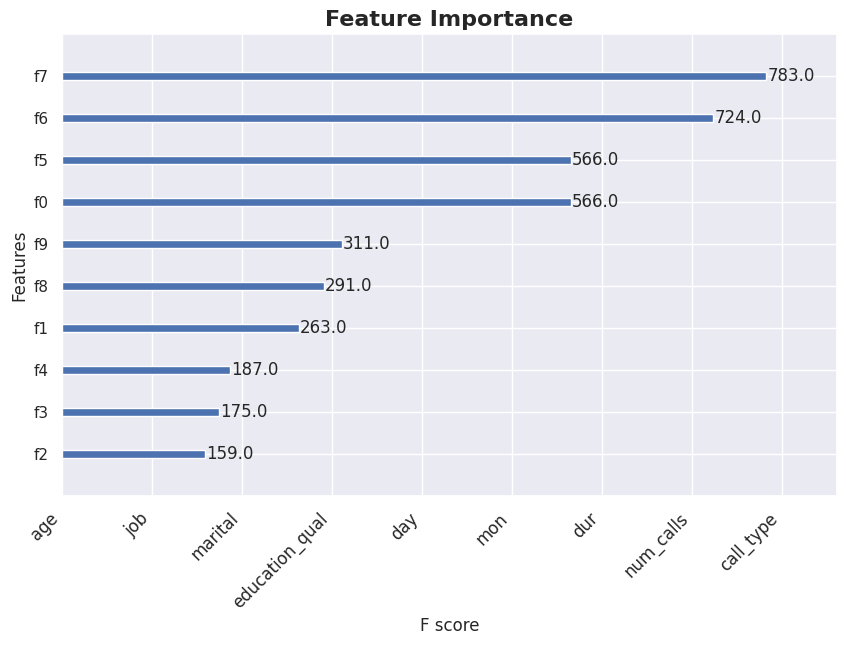

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Train model
xgb_model = XGBClassifier(learning_rate = 0.14,n_estimators=100, random_state=42)
xgb_model.fit(x_train_smt, y_train_smt)

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax)
ax.set_title("Feature Importance", fontsize=16, fontweight="bold")
ax.set_xticklabels(['age', 'job', 'marital', 'education_qual', 'day', 'mon', 'dur', 'num_calls', 'call_type', 'prev_outcome'], fontsize=12, rotation=45, ha="right")
plt.show()

# **CONCLUSION**

*Further analysis of the feature importance shows that the top few features that 
significantly influence customer subscription to insurance are duration, age, day, month, and job.

*Longer call duration positively affects customer subscription, 

*while the age of the person also plays a crucial role, with middle-aged people being targeted more. 

*Additionally, people who subscribed to insurance are mostly in the mid of the month, and

*MARCH appears to be the month where people subscribed to insurance more.

*Moreover, blue-collar people are more targeted for insurance, but people who subscribed more are from Students. 

*Therefore, it is recommended that companies focus on these top features to increase customer subscription rates to insurance.